In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("sensor.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


# EDA

<AxesSubplot:xlabel='machine_status', ylabel='count'>

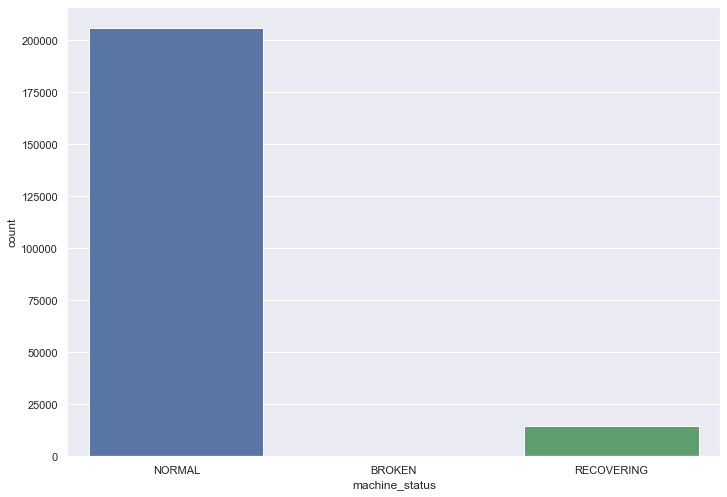

In [3]:
sns.countplot(data=df, x="machine_status")

In [4]:
df["machine_status"] = pd.Categorical(df["machine_status"])

In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [6]:
def numerical_machine_status(x):
    if x=="NORMAL":
        return 1
    elif x=="BROKEN":
        return -1
    else:
        return 0

In [7]:
df["machine_status_numerical"] = df["machine_status"].apply(numerical_machine_status)

<AxesSubplot:xlabel='timestamp', ylabel='machine_status_numerical'>

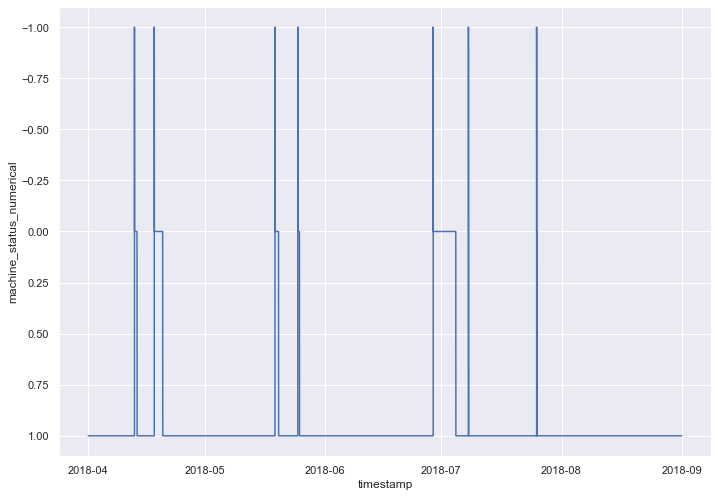

In [8]:
sns.lineplot(data=df, x="timestamp", y="machine_status_numerical")

Comme le status RECOVERING suit toujours le status BROKEN. Dans RECOVERING, la pompe essaie de récupérer de l'état BROKEN, donc l'état RECOVERING est considéré comme un état BROKEN (disons plus ABNORMAL).

In [9]:
def relabel_machine_status(x):
    if x == "BROKEN" or x == "RECOVERING":
        return "ABNORMAL"
    else:
        return x

In [10]:
df["relabelled_machine_status"] = df["machine_status"].apply(relabel_machine_status)

<AxesSubplot:xlabel='relabelled_machine_status', ylabel='count'>

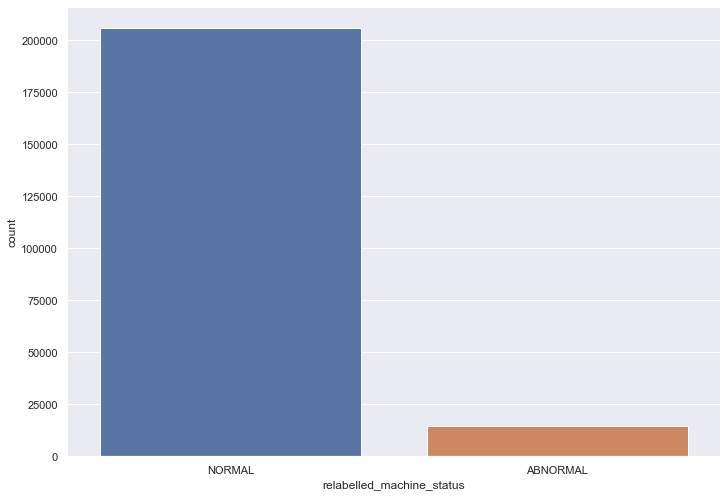

In [11]:
sns.countplot(data=df, x="relabelled_machine_status")

In [12]:
def numerical_machine_status(x):
    if x=="NORMAL":
        return 0
    else:
        return -1

In [13]:
df["relabelled_machine_status_numerical"] = df["relabelled_machine_status"].apply(numerical_machine_status)

<AxesSubplot:xlabel='timestamp'>

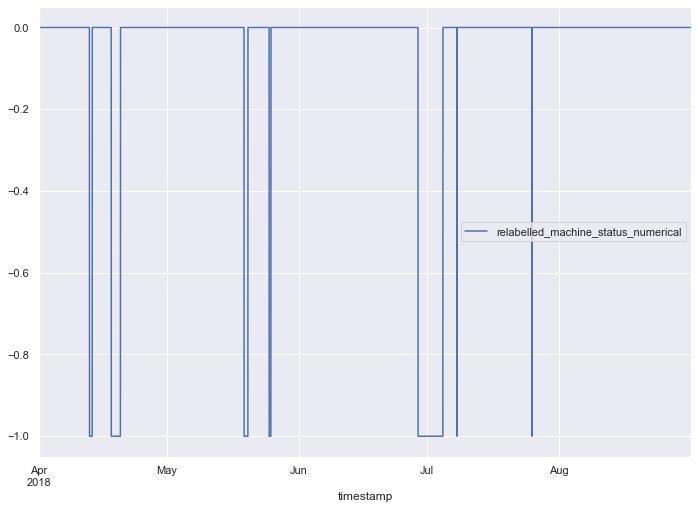

In [14]:
df.plot(x="timestamp", y="relabelled_machine_status_numerical")

## Missing values

In [15]:
missing_values = pd.DataFrame(df.drop(["timestamp", "machine_status", "machine_status_numerical"], axis=1).isnull().sum()).reset_index()
missing_values[0] = missing_values[0]*100/df.shape[0]
missing_values.sort_values(0, ascending=False, inplace=True)

<AxesSubplot:xlabel='0', ylabel='index'>

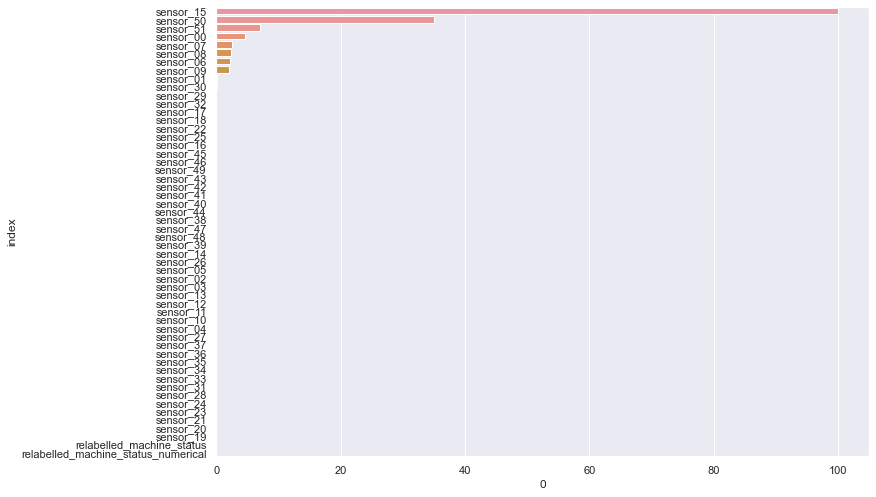

In [16]:
sns.barplot(data=missing_values, x=0, y="index")

## Fillna

In [21]:
filled_df = df.fillna(df.rolling(6, min_periods=1, center=True).mean())
filled_df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,machine_status_numerical,relabelled_machine_status,relabelled_machine_status_numerical
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,1,NORMAL,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,1,NORMAL,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,1,NORMAL,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,1,NORMAL,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,1,NORMAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL,1,NORMAL,0
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL,1,NORMAL,0
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL,1,NORMAL,0
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL,1,NORMAL,0


In [22]:
filled_df.isnull().sum()

timestamp                                   0
sensor_00                               10173
sensor_01                                 307
sensor_02                                   3
sensor_03                                   3
sensor_04                                   3
sensor_05                                   3
sensor_06                                4762
sensor_07                                5417
sensor_08                                5076
sensor_09                                4557
sensor_10                                   3
sensor_11                                   3
sensor_12                                   3
sensor_13                                   3
sensor_14                                   3
sensor_15                              220320
sensor_16                                  13
sensor_17                                  23
sensor_18                                  23
sensor_19                                   3
sensor_20                         

## Timestamp type

In [30]:
df.iloc[1]["timestamp"] - df.iloc[0]["timestamp"]

Timedelta('0 days 00:01:00')

In [31]:
false = 0
for i in range(1, len(df)):
    if df.iloc[i]["timestamp"] - df.iloc[i-1]["timestamp"] != df.iloc[1]["timestamp"] - df.iloc[0]["timestamp"]:
        false += 1
print("same interval for all: ", false == 0)

same interval for all:  True


## Description of the Dataframe

In [32]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,relabelled_machine_status_numerical
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000,220320.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667,-0.065741
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607,0.247829
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779,-1.000000
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800,0.000000
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000,0.000000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500,0.000000
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000,0.000000


## Handle missing

In [77]:
# dropping columns machine_status, new_machine_status and sensor_15
sensor_data = df.drop(columns=['machine_status', 'relabelled_machine_status', 'machine_status_numerical'], axis=1)
# filling missing values with -1
for sensor in list(sensor_data.columns)[1:-1]:
    sensor_data[sensor].fillna(-1, inplace=True)

## Distribution of normal and abnormal for all sensors

In [78]:
sensors = [
    ["sensor_00", "sensor_01", "sensor_02", "sensor_03"],
    ["sensor_04", "sensor_05", "sensor_06", "sensor_07"],
    ["sensor_08", "sensor_09", "sensor_10", "sensor_11"],
    ["sensor_12", "sensor_13", "sensor_14", "sensor_15"],
    ["sensor_16", "sensor_17", "sensor_18", "sensor_19"],
    ["sensor_20", "sensor_21", "sensor_22", "sensor_23"],
    ["sensor_24", "sensor_25", "sensor_26", "sensor_27"],
    ["sensor_28", "sensor_29", "sensor_30", "sensor_31"],
    ["sensor_32", "sensor_33", "sensor_34", "sensor_35"],
    ["sensor_36", "sensor_37", "sensor_38", "sensor_39"],
    ["sensor_40", "sensor_41", "sensor_42", "sensor_43"],
    ["sensor_44", "sensor_45", "sensor_46", "sensor_47"],
    ["sensor_48", "sensor_49", "sensor_50", "sensor_51"],
]

In [90]:
def get_distrib_plot(sensor, df, ax_given=None):
    """
    Function to plot distribution of sensor readings for Normal and Broken state
    """
    # sensor values corrensponding machine status Normal
    normal = df[df['relabelled_machine_status_numerical']==0][sensor].values
    # sensor values corrensponding machine status Broken
    broken = df[df['relabelled_machine_status_numerical']==-1][sensor].values

    # distribution for normal state
    sns.distplot(normal, hist=False, label="Normal", ax=ax_given) 
    # distribution for broken state
    sns.distplot(broken, hist=False, label="Broken", ax=ax_given) 
    plt.title('Sensor readings corresponding Normal and Broken state')
    plt.xlabel(f'{sensor} readings')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


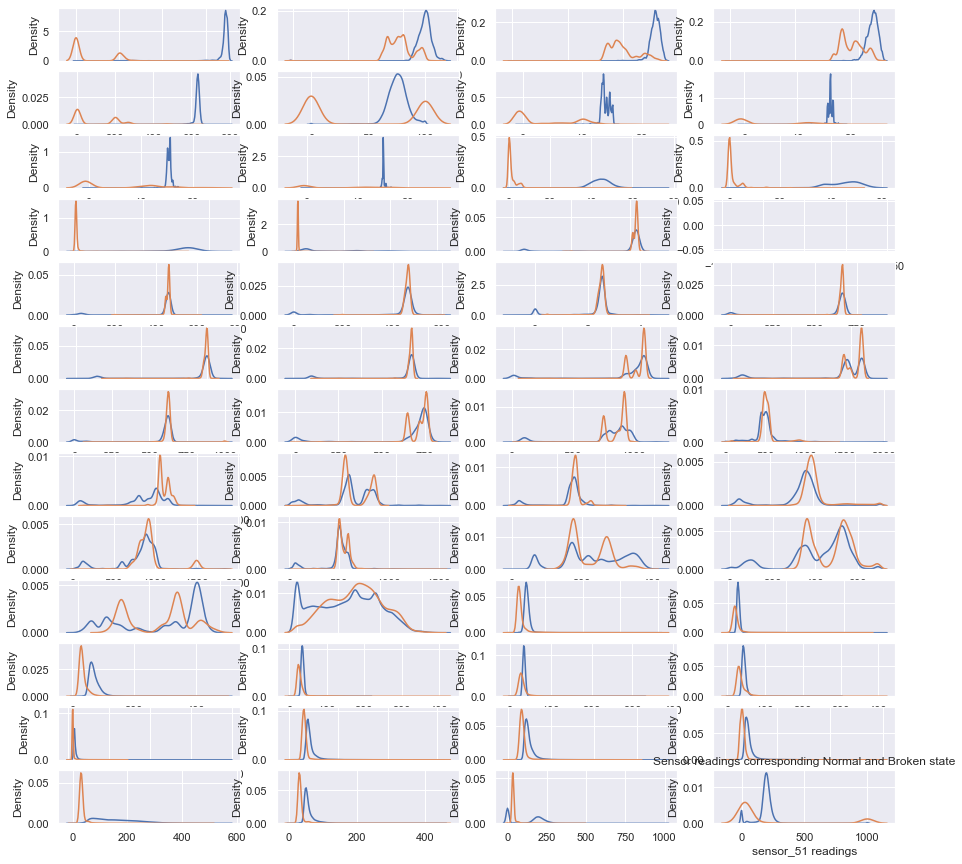

In [91]:
fig, axes = plt.subplots(13, 4, figsize=(15, 15))
for row in range(13):
    for col in range(4):
        get_distrib_plot(sensors[row][col], sensor_data, axes[row][col])
plt.show()

In [40]:
def shift_labels(sensor_list, df):
    """
    Function to shift labels by 10 min
    """
    new_features = {}

    for sensor in sensor_list:
        new_features[sensor] = df[sensor]

    labels = [None] * df.shape[0]

    for i in range(0, df.shape[0]-10):
        labels[i] = sensor_data['label'][i+10]
    
    new_features['label'] = labels
    new_df = pd.DataFrame(new_features)
    # dropping last rows with null value
    new_df.drop(new_df.tail(10).index,inplace=True)
    return new_df

In [41]:
def get_mean_features(sensor_list, df):
    """
    Function to get mean val of 10min window
    """
    new_features = {}

    # looping over all sensors and calculating mean of 10 values
    for sensor in sensor_list:
        new_features[sensor] = df[sensor].rolling(10).mean().values

    labels = []
    # creating list with None value
    labels = [None] * (df.shape[0])

    for i in range(0, df.shape[0]-10):
        labels[i+9] = df['label'][i+10]

    new_features['label'] = labels

    # creating dataframe
    new_df = pd.DataFrame(new_features)
    # removing first 9 rows with null values
    new_df.drop(new_df.head(9).index, inplace=True)
    # resetting index 
    new_df.reset_index(inplace=True, drop=True)
    # dropping last row with null value
    new_df.drop(new_df.tail(1).index, inplace=True)
    return new_df

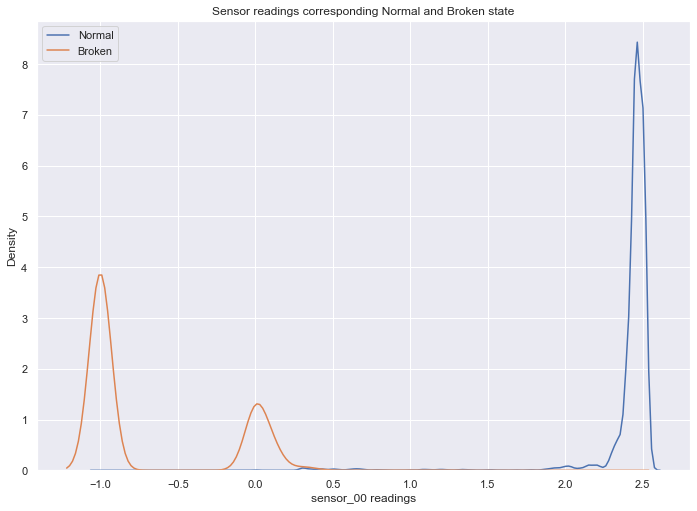

In [88]:
get_distrib_plot('sensor_00', sensor_data)
plt.show()

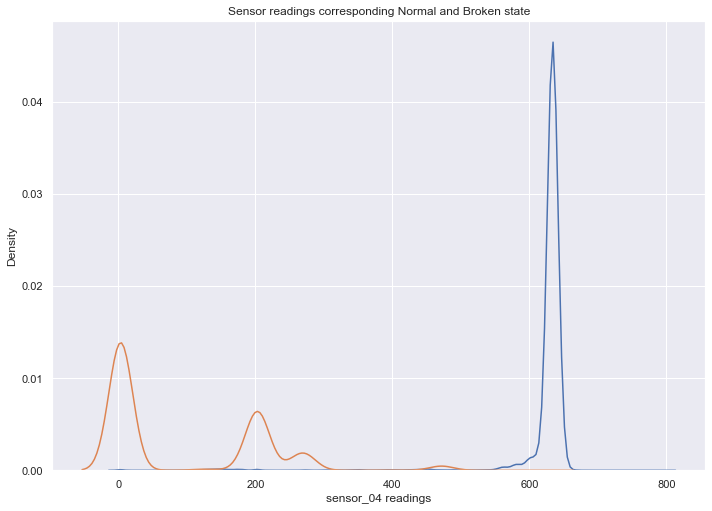

In [92]:
get_distrib_plot('sensor_04', sensor_data)
plt.show()

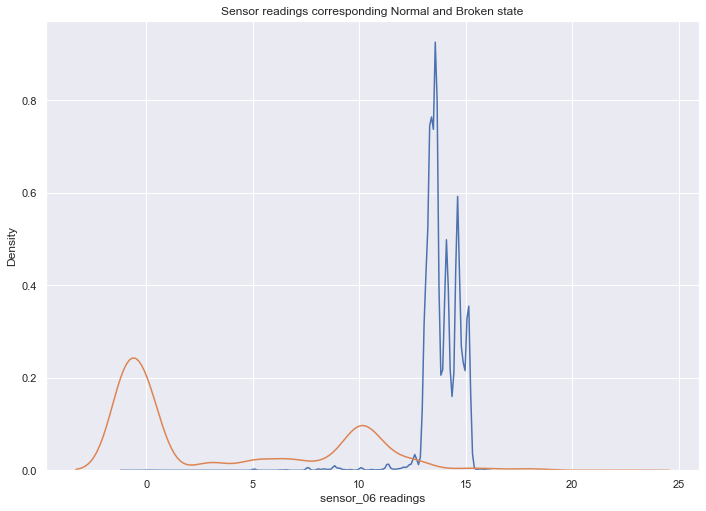

In [93]:
get_distrib_plot('sensor_06', sensor_data)
plt.show()

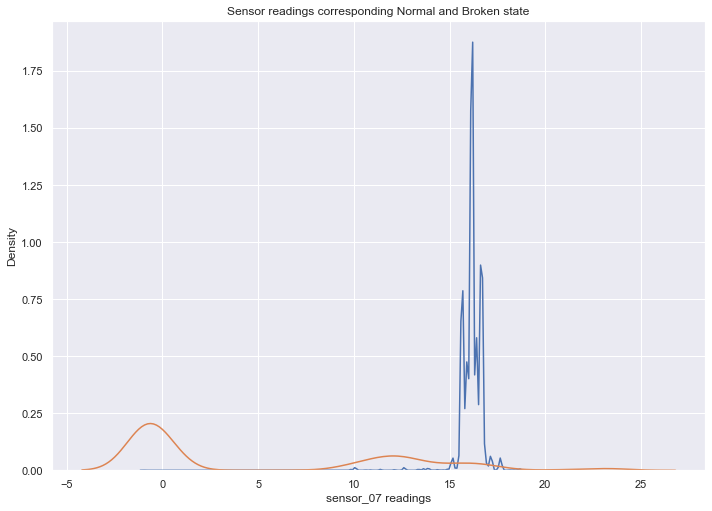

In [94]:
get_distrib_plot('sensor_07', sensor_data)
plt.show()

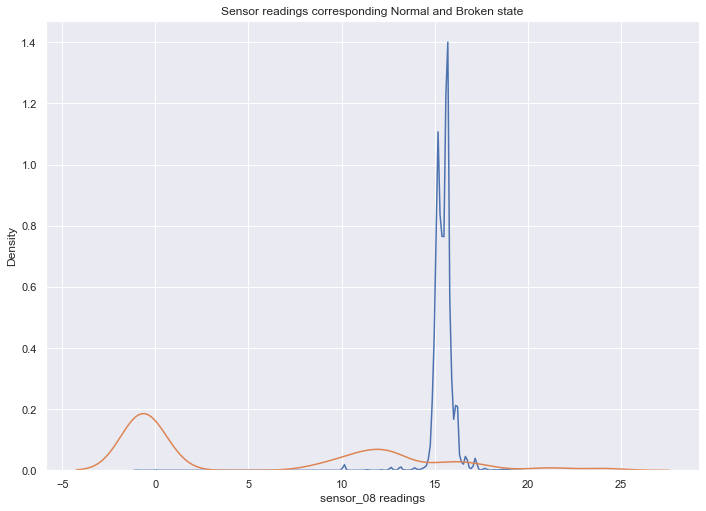

In [95]:
get_distrib_plot('sensor_08', sensor_data)
plt.show()

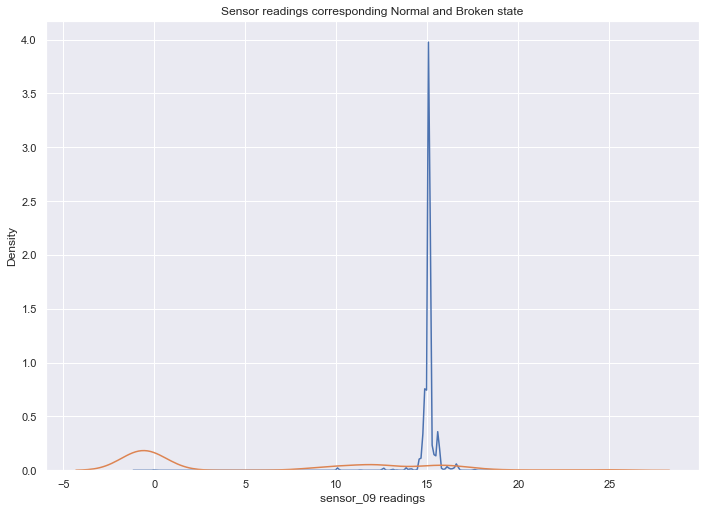

In [96]:
get_distrib_plot('sensor_09', sensor_data)
plt.show()

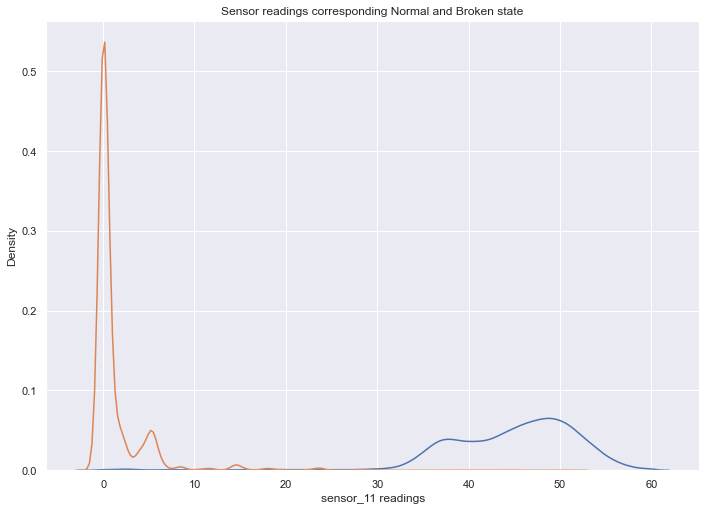

In [98]:
get_distrib_plot('sensor_11', sensor_data)
plt.show()

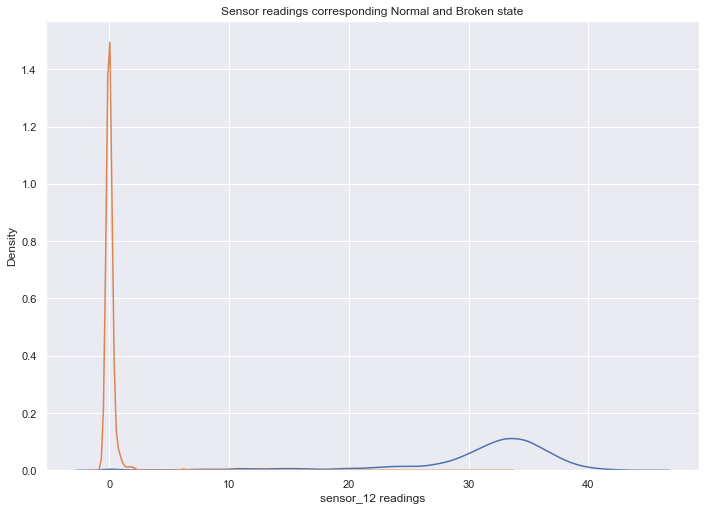

In [99]:
get_distrib_plot('sensor_12', sensor_data)
plt.show()

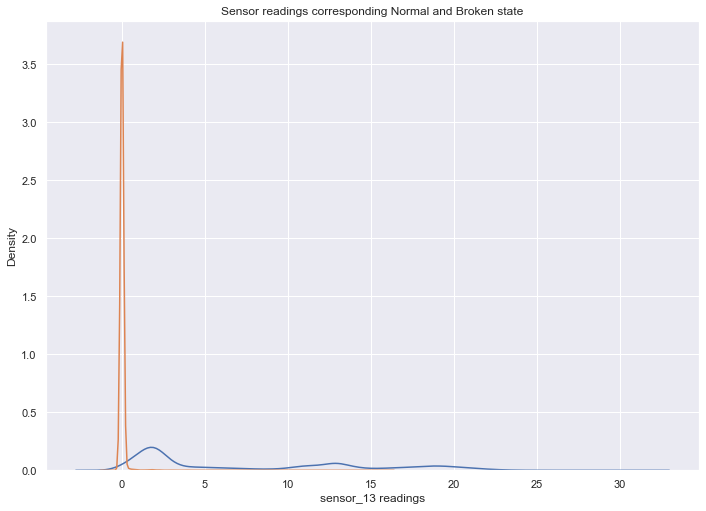

In [100]:
get_distrib_plot('sensor_13', sensor_data)
plt.show()

sensor_00
sensor_04
sensor_06


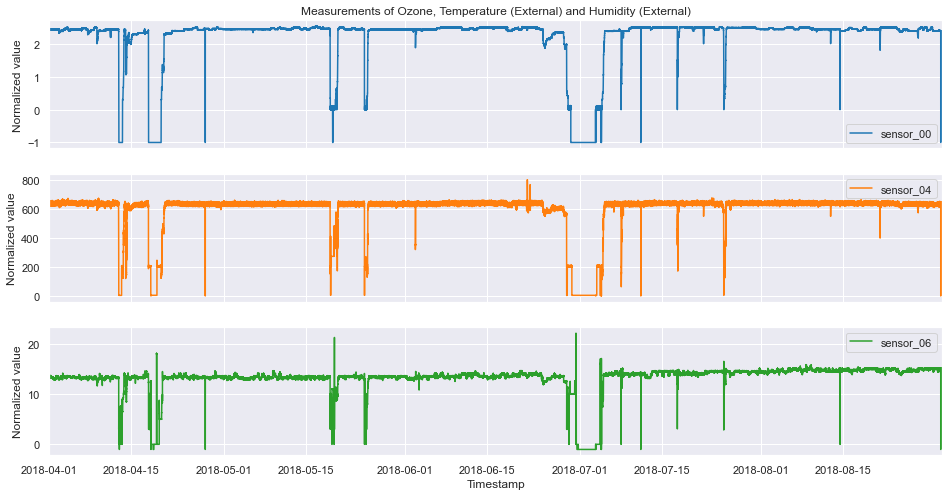

In [105]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
cols = [1, 5, 7]
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(3):
    ax = axs[i]
    col = sensor_data.columns[cols[i]]
    print(col)
    ax.plot(sensor_data["timestamp"], sensor_data[col], color=colors[i], label=col)
    ax.set_ylabel('Normalized value')
    ax.set_xlim([sensor_data["timestamp"].min(), sensor_data["timestamp"].max()])
    ax.legend()
    #ax.axvspan('2020-05-26 09:00:00-04:00', '2020-05-28 9:00:00-04:00', alpha=0.05, color='red')
    #ax.axvspan('2020-05-29 18:00:00-04:00', '2020-06-01 8:00:00-04:00', alpha=0.05, color='red')
axs[0].set_title('Measurements of Ozone, Temperature (External) and Humidity (External)')
plt.xlabel('Timestamp')
plt.show()

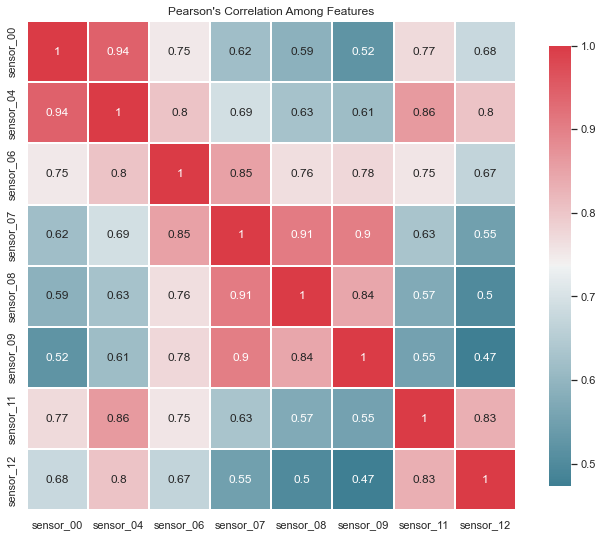

In [107]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
        df[["sensor_00", "sensor_04", "sensor_06", "sensor_07", "sensor_08", "sensor_09", "sensor_11", "sensor_12"]].corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.title("Pearson's Correlation Among Features")
plt.show()

# Pre processing

In [165]:
columns_to_drop = [
    "timestamp",
    "machine_status",
    "relabelled_machine_status",
    "machine_status_numerical",
    "relabelled_machine_status_numerical"
]
df_normalized = (df.drop(columns=columns_to_drop) - df.drop(columns=columns_to_drop).mean()) / df.drop(columns=columns_to_drop).std()
df_normalized["timestamp"] = df["timestamp"]
#df_normalized.set_index("timestamp", inplace=True)
df_normalized

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,timestamp
0,0.226024,-0.151547,0.639357,1.057627,0.303429,0.177089,-0.041631,0.130935,0.179842,0.121570,...,-0.176787,-0.260503,1.759521,0.185876,-0.588604,0.086292,0.553102,0.919515,-0.011961,2018-04-01 00:00:00
1,0.226024,-0.151547,0.639357,1.057627,0.303429,0.177089,-0.041631,0.130935,0.179842,0.121570,...,-0.176787,-0.260503,1.759521,0.185876,-0.588604,0.086292,0.553102,0.919515,-0.011961,2018-04-01 00:01:00
2,0.175906,-0.072552,0.639357,1.093515,0.334771,0.008646,-0.081751,0.088216,0.204697,0.100824,...,-0.200367,-0.285498,1.736982,0.204375,-0.588604,0.061664,0.522873,0.892911,0.009162,2018-04-01 00:02:00
3,0.214089,-0.151547,0.627521,1.093514,0.260034,0.207684,-0.085092,0.183521,0.243752,0.135404,...,-0.271104,-0.310493,1.691902,0.204375,-0.588604,0.061664,0.507758,0.879610,0.003881,2018-04-01 00:03:00
4,0.178293,-0.138382,0.639357,1.093514,0.317894,0.184560,-0.068376,0.167089,0.243752,0.135404,...,-0.223945,-0.335488,1.714441,0.241374,-0.533185,0.089810,0.492643,0.906213,-0.011961,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,0.085218,0.032772,-0.094513,-0.252232,0.305840,-0.509038,0.747361,0.367556,0.222446,0.173440,...,-0.506894,2.214009,0.722702,0.019383,-0.311512,0.747709,5.042199,NaN,0.259994,2018-08-31 23:55:00
220316,0.068511,0.032772,-0.082674,-0.252232,0.279321,-0.437199,0.764078,0.390562,0.222446,0.152689,...,-0.506894,2.089034,0.587464,0.000884,-0.339221,0.765299,5.178234,NaN,0.259994,2018-08-31 23:56:00
220317,0.058965,0.032772,-0.094513,-0.252232,0.244765,-0.352750,0.733991,0.390562,0.243752,0.152689,...,-0.436157,1.964059,0.452227,0.000884,-0.339221,0.807516,5.132887,NaN,0.267916,2018-08-31 23:57:00
220318,0.082831,0.032772,-0.094512,-0.252232,0.312269,-0.480087,0.747361,0.328118,0.265054,0.152689,...,-0.294682,1.864078,0.362070,0.019383,-0.366930,0.870844,5.057316,NaN,0.286398,2018-08-31 23:58:00


In [166]:
df_normalized = df_normalized.groupby(pd.Grouper(key="timestamp", axis=0, freq="1h")).mean()
#df_normalized.set_index("timestamp", inplace=True)
df_normalized

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.199612,0.292575,0.620419,1.022339,0.301662,0.135275,-0.063641,0.144904,0.246296,0.137362,...,-0.325949,-0.320620,-0.335488,0.542010,-0.057081,-0.481462,0.566229,1.099503,0.875028,0.066897
2018-04-01 01:00:00,0.198975,0.128663,0.610753,0.902418,0.302465,0.067606,0.042282,0.142439,0.251326,0.140128,...,-0.250223,-0.362276,0.048603,0.330138,-0.264889,-0.482385,0.362292,0.849604,0.724496,0.009470
2018-04-01 02:00:00,0.197464,0.425109,0.584515,0.760965,0.303791,0.093678,0.043954,0.144301,0.229253,0.140070,...,-0.309873,-0.356774,-0.036797,0.608126,0.027399,-0.561356,0.276332,0.978332,0.647494,0.066589
2018-04-01 03:00:00,0.199771,0.322417,0.575047,0.606055,0.296777,-0.008095,0.047520,0.143643,0.239491,0.139724,...,-0.403367,-0.385069,0.704724,0.829765,-0.157285,-0.575211,0.650489,2.482256,1.138033,0.182325
2018-04-01 04:00:00,0.197862,0.223017,0.545652,0.569869,0.307675,-0.187683,0.038661,0.140083,0.246119,0.141568,...,-0.436365,-0.389392,1.208374,2.035630,0.717421,-0.556276,0.756210,2.980541,1.012701,0.081595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,0.074199,0.529996,0.034112,-0.131414,0.289580,0.341837,0.751263,0.377361,0.226709,0.142606,...,-0.481631,-0.245167,3.311710,0.702792,0.021849,-0.275028,0.662920,1.553451,NaN,-0.052710
2018-08-31 20:00:00,0.073881,0.358403,-0.014418,-0.083566,0.288589,-0.515187,0.740231,0.373363,0.234580,0.134884,...,-0.506591,-0.135917,0.754297,1.080329,1.047632,-0.490698,1.710104,3.683883,NaN,0.369701
2018-08-31 21:00:00,0.073801,0.226089,-0.062948,-0.190627,0.285192,-0.242988,0.743352,0.372650,0.232390,0.142664,...,-0.457517,-0.373673,2.248169,3.072074,1.465407,1.159386,2.605654,2.751551,NaN,0.241028


# Points anomaly detection

In [167]:
def is_outlier(data, rolling_median, thresh):
    return abs(data - rolling_median) >= thresh

In [168]:
data_nrm5 = df_normalized.rolling(5, center=True).mean()
labels = is_outlier(df_normalized, data_nrm5, 0.25).astype('int')

In [169]:
labels

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2018-04-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2018-04-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,1,1,1,1,0,0
2018-08-31 20:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2018-08-31 21:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0


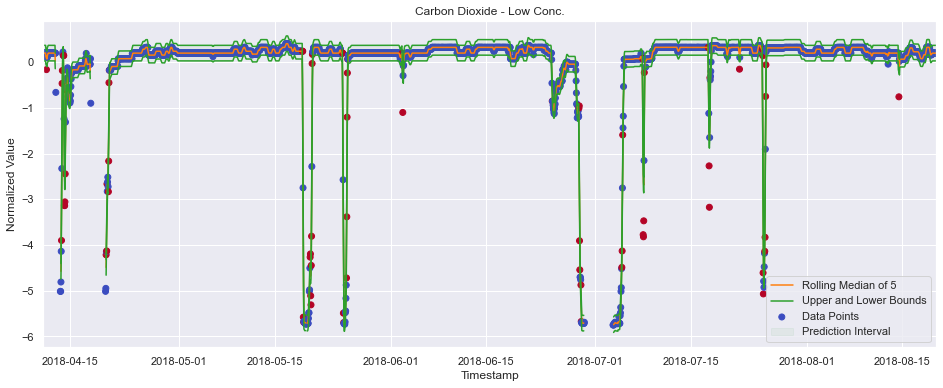

In [174]:
t = ['2018-04-11 00:00:00', '2018-08-20 00:00:00']
series = df_normalized['sensor_00']
series = series.loc[(series.index > pd.to_datetime(t[0])) & (series.index < pd.to_datetime(t[1]))]
label = labels['sensor_00']
label = label.loc[(label.index > pd.to_datetime(t[0])) & (label.index < pd.to_datetime(t[1]))]
series_nrm5 = data_nrm5['sensor_00']
series_nrm5 = series_nrm5.loc[(series_nrm5.index > pd.to_datetime(t[0])) & (series_nrm5.index < pd.to_datetime(t[1]))]
fig, ax = plt.subplots(figsize=(16, 6))
plt.scatter(series.index, series, c=label, cmap=plt.get_cmap('coolwarm'), label='Data Points', sty)
plt.plot(series_nrm5.index, series_nrm5, color='tab:orange', label='Rolling Median of 5')
plt.plot(series_nrm5.index, series_nrm5+0.17, color='tab:green', label='Upper and Lower Bounds')
plt.plot(series_nrm5.index, series_nrm5-0.17, color='tab:green')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5+0.17, color='tab:green', alpha=0.05, label='Prediction Interval')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5-0.17, color='tab:green', alpha=0.05)
plt.xlim(series.index[0], series.index[-1])
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')
plt.title('Carbon Dioxide - Low Conc.')
plt.show()

In [158]:
df_normalized[(df_normalized.index >= '2018-04-11 00:00:00') & (df_normalized.index<='2018-04-13 00:00:00')]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-11 00:00:00,0.198339,0.779266,0.182465,-0.838978,0.290009,0.542969,0.051643,0.169717,0.242332,0.139206,...,-0.039122,0.106161,0.141918,0.715940,-0.049064,-0.411265,1.044290,1.246872,1.034797,0.478351
2018-04-11 00:10:00,0.198339,0.818763,0.181281,-0.844361,0.295232,0.446957,0.038939,0.141454,0.283163,0.138513,...,-0.079735,-0.084829,0.246897,0.961621,-0.160060,-0.281031,0.926431,1.689736,1.329653,0.539079
2018-04-11 00:20:00,0.201441,0.796381,0.175363,-0.862305,0.309296,0.309288,0.043285,0.159200,0.212862,0.147505,...,-0.100041,-0.341841,0.024441,1.051779,-0.139710,-0.225613,0.944022,1.872625,1.323889,0.433465
2018-04-11 00:30:00,0.197145,0.771366,0.164709,-0.862305,0.311144,0.349827,0.042282,0.157228,0.246593,0.136094,...,-0.031507,-0.249882,-0.273000,0.880479,-0.126761,-0.231155,0.792037,1.975405,1.576179,0.581325
2018-04-11 00:40:00,0.197146,0.789798,0.161159,-0.869482,0.308090,0.215393,0.034593,0.154927,0.268251,0.144047,...,0.016720,-0.030597,-0.295496,1.008954,-0.367251,-0.391868,0.766706,0.944576,1.471095,0.576044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-12 23:20:00,NaN,-0.408277,-0.011656,0.151493,-4.079664,-4.242997,-4.842462,-7.181221,-7.445611,0.128486,...,-0.440172,-0.969044,-0.680420,1.121652,-0.831582,-0.887864,-0.975844,1.310354,-1.281041,-1.308899
2018-04-12 23:30:00,NaN,-0.446457,-0.079124,0.216088,-4.079664,-4.242997,-4.837113,-7.181221,-7.445966,0.118804,...,-0.498553,-0.983191,-0.707915,0.332768,-0.816783,-0.915573,-1.047263,1.014104,-1.434455,-1.346920
2018-04-12 23:40:00,NaN,-0.463573,-0.089778,0.275301,-4.080146,-4.242997,-4.841125,-7.181221,-7.445255,0.123990,...,-0.518859,-1.004412,-0.747907,-0.016595,-0.813083,-0.937740,-1.100739,0.761686,-1.579888,-1.376228
